#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec # to do the grid of plots

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


#Explorartory Data Analysis

In [ ]:
Credit_data=pd.read_csv("/content/drive/My Drive/Data Mining/creditcard.csv")

In [ ]:
Credit_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
Credit_data.shape

(284807, 31)

In [ ]:
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that we don't have null values

In [ ]:
Credit_data.describe(percentiles=[.1,0.2,0.3,.4,0.5,.6,.7,.8,.9])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
10%,35027.000000,-1.893272e+00,-1.359862e+00,-1.802587e+00,-1.656329e+00,-1.302171e+00,-1.167450e+00,-1.078148e+00,-4.589454e-01,-1.294047e+00,-1.032158e+00,-1.289015e+00,-1.148031e+00,-1.280012e+00,-1.003676e+00,-1.173945e+00,-1.059361e+00,-8.042644e-01,-9.769348e-01,-9.856163e-01,-3.896021e-01,-3.674467e-01,-8.674884e-01,-3.286342e-01,-8.703584e-01,-6.061010e-01,-5.480343e-01,-2.114656e-01,-1.556155e-01,1.000000,0.000000
20%,47694.200000,-1.134663e+00,-7.908142e-01,-1.169050e+00,-1.066085e+00,-8.595815e-01,-8.781527e-01,-6.833164e-01,-2.662999e-01,-8.088755e-01,-6.664809e-01,-9.169940e-01,-5.730710e-01,-8.247022e-01,-5.673035e-01,-7.487495e-01,-6.164855e-01,-5.757627e-01,-6.267061e-01,-5.828234e-01,-2.512018e-01,-2.663929e-01,-6.416046e-01,-2.037425e-01,-4.442769e-01,-3.917190e-01,-3.895481e-01,-9.111428e-02,-6.544115e-02,3.570000,0.000000
30%,60776.000000,-7.472943e-01,-4.363931e-01,-6.168060e-01,-6.962262e-01,-5.444552e-01,-6.678449e-01,-4.260203e-01,-1.581584e-01,-5.021651e-01,-4.257577e-01,-6.129743e-01,-2.719676e-01,-4.971726e-01,-3.124565e-01,-4.385696e-01,-3.429957e-01,-3.969463e-01,-3.856909e-01,-3.451006e-01,-1.787040e-01,-1.878180e-01,-4.344265e-01,-1.261571e-01,-2.635025e-01,-2.583651e-01,-2.744373e-01,-5.423468e-02,-4.026708e-02,8.910000,0.000000
40%,73261.400000,-4.267559e-01,-1.538049e-01,-1.990610e-01,-3.941610e-01,-2.901118e-01,-4.794725e-01,-1.593408e-01,-6.605715e-02,-2.577302e-01,-2.481867e-01,-3.171382e-01,-5.045118e-02,-2.395771e-01,-1.196655e-01,-1.887507e-01,-1.252125e-01,-2.355630e-01,-1.855848e-01,-1.620252e-01,-1.208067e-01,-1.064266e-01,-2.018541e-01,-6.512670e-02,-4.580667e-02,-1.288661e-01,-1.663338e-01,-2.436683e-02,-1.195983e-02,13.000000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
60%,120396.000000,1.035107e+00,3.027378e-01,4.970396e-01,2.848562e-01,1.866249e-01,-4.819964e-02,2.135123e-01,

It is difficult to see the outliers by percentiles because the values are in exponential form

## Let's explore the Time feature

In [ ]:
timedelta = pd.to_timedelta(Credit_data['Time'], unit='s')
Credit_data['Time_min'] = (timedelta.dt.components.minutes).astype(int)
Credit_data['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [ ]:
Credit_data=Credit_data.drop('Time',axis=1)

In [ ]:
Credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0


<Figure size 720x576 with 0 Axes>

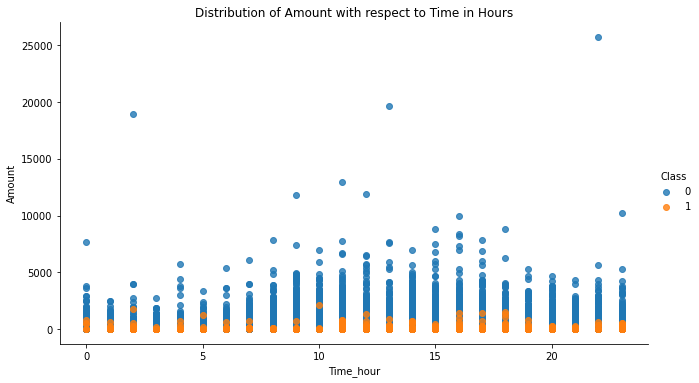

In [ ]:
plt.figure(figsize=(10,8))

ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=Credit_data, hue='Class')
plt.title('Distribution of Amount with respect to Time in Hours')
plt.show()

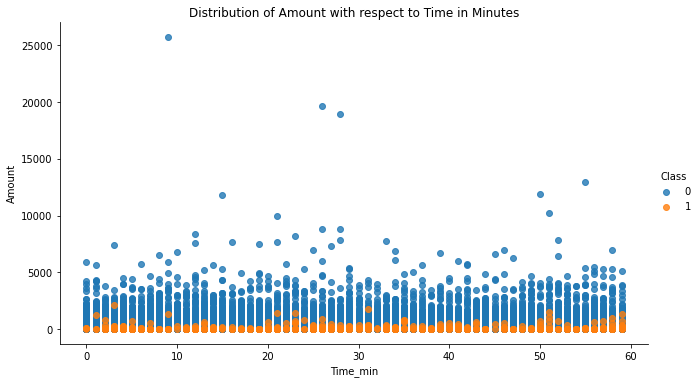

In [ ]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=Credit_data, hue='Class')
plt.title("Distribution of Amount with respect to Time in Minutes")
plt.show()

##Let's explore the Monetary value feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


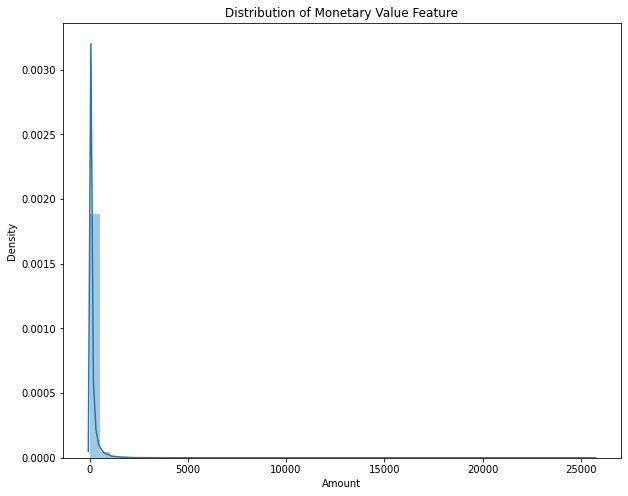

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(Credit_data.Amount)

##Let's explore the class variable 

In [ ]:
calss_0=len(Credit_data[Credit_data['Class']==0])/len(Credit_data.index)*100
calss_count_0=len(Credit_data[Credit_data['Class']==0])
print("The count of class Non-Fraudulent is {0} in percentage {1}".format(calss_count_0,round(calss_0,3)))

The count of class Non-Fraudulent is 284315 in percentage 99.827


In [ ]:
calss_1=len(Credit_data[Credit_data['Class']==1])/len(Credit_data.index)*100
calss_count_1=len(Credit_data[Credit_data['Class']==1])
print("The count of class Fraudulent is {0} in percentage {1}".format(calss_count_1,round(calss_1,3)))

The count of class Fraudulent is 492 in percentage 0.173


Distribuition of Normal(0) and Frauds(1): 
0    284315
1       492
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


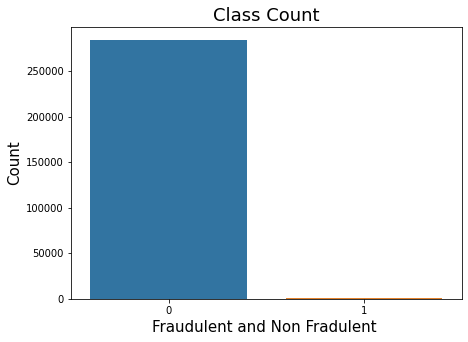

In [ ]:
# plt.figure(figsize=(8,6))

# x=[calss_count_0,calss_count_1]
# labels=["Non-Fraudulent","Fraudulent"]
# myexplode=[0,0.1]
# fig1, ax1 = plt.subplots()
# ax1.pie(x, autopct='%1.1f%%',labels=labels,explode = myexplode,
#         shadow=True, startangle=90)
# ax1.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

#Lets start looking the difference by Normal and Fraud transactions
print("Distribuition of Normal(0) and Frauds(1): ")
print(Credit_data["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(Credit_data['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Fraudulent and Non Fradulent ", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

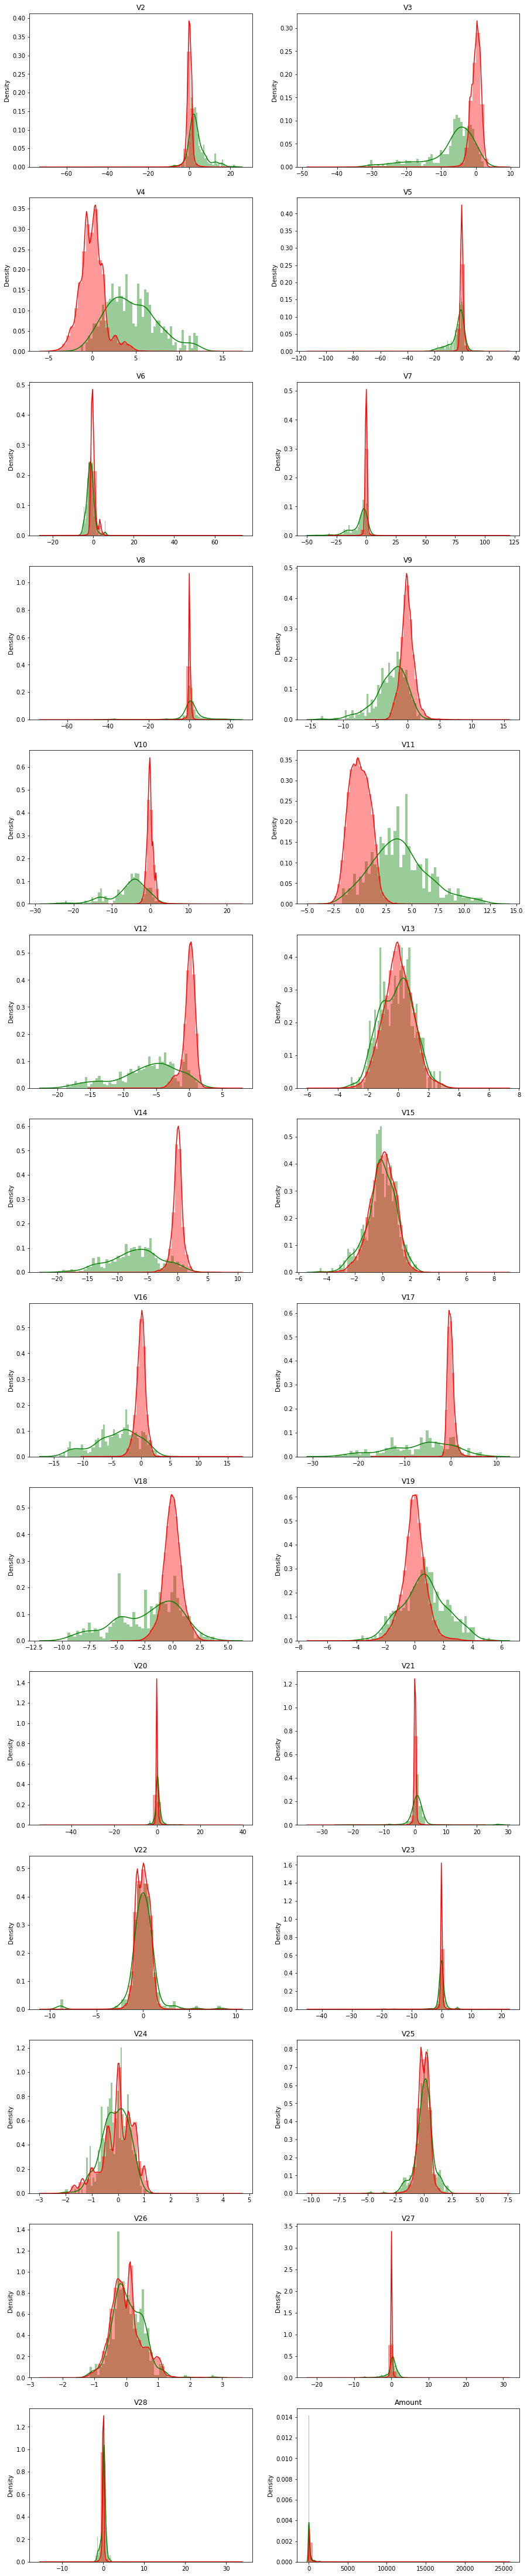

In [ ]:
#Looking the V's features
columns = Credit_data.iloc[:,1:29].columns

frauds = Credit_data.Class == 1
normals = Credit_data.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(Credit_data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(Credit_data[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(Credit_data[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

Text(0.5, 1.0, 'Heatmap of Correlation')

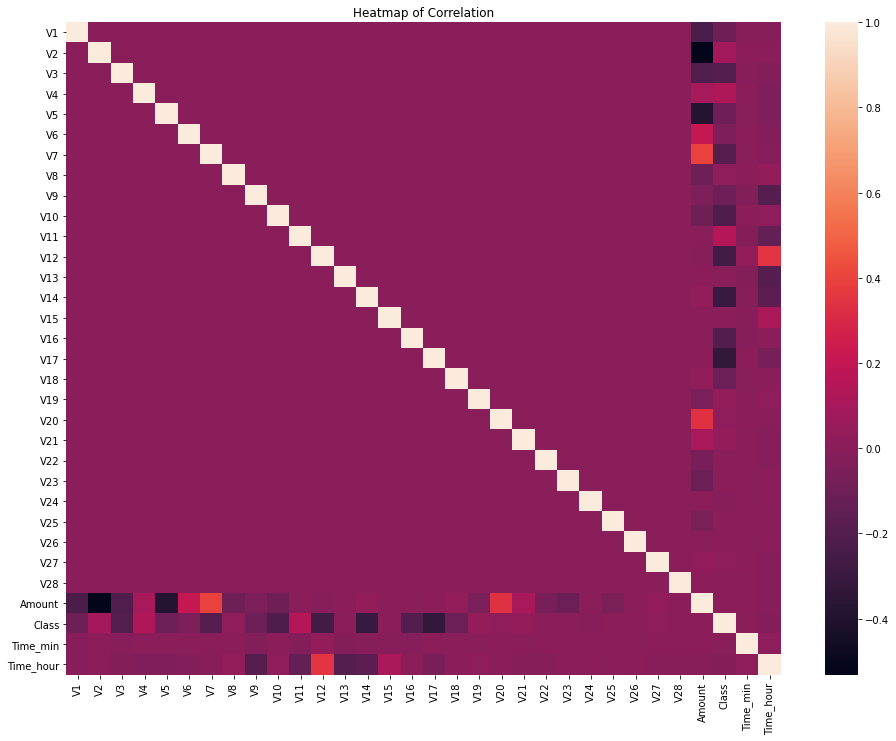

In [ ]:
#heatmap
plt.figure(figsize=(16,12))
heat = sns.heatmap(data=Credit_data.corr())
plt.title('Heatmap of Correlation')

In [ ]:
# #Creating new cloumn for amount for cost analysis in the future
# Credit_data['Cost_analysis']=Credit_data['Amount']

We can see there is correlation between the some of the independent variables. Lets deal this correlation part in preprocessing part of analysis


Standardising the two columns [money, time]. We are using standardscalar for scaling because it will scaled with standard divation which will be help in removal of outliers

In [ ]:
# # creating object for StandardScalar
# scalar=StandardScaler()
# varlist=['Time_min','Time_hour','Amount']
# Credit_data[varlist]=scalar.fit_transform(Credit_data[varlist])

In [ ]:
# Credit_data[varlist].describe()

## Functions


TP*amount-FN*Amount-(FP+TP)25


In [ ]:
def results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred, zero_division=1)))

In [ ]:
  
def Cost_prediction(x_t,y_t):
    results_DTC = pd.DataFrame()
    results_DTC['true_value'] = x_t
    results_DTC['predicted'] = y_t
    results_DTC['Amount'] =np.array(X_test['Amount'])

    results_DTC['correct'] = np.where(results_DTC.predicted == results_DTC.true_value, 1, 0)
    results_DTC['tI_error'] = np.where((results_DTC.predicted == 1) & (results_DTC.true_value == 0), 1, 0)
    results_DTC['tII_error'] = np.where((results_DTC.predicted == 0) & (results_DTC.true_value == 1), 1, 0)
    results_DTC['correctly_classified_frauds'] = np.where((results_DTC.predicted == 1) & (results_DTC.true_value == 1), 1, 0)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.set_title('Model 2 Performance: Error Breakdown')
    lbl = ['Incorrectly Identified','Correctly Identified ({}%)'.format(str(100*results_DTC.correct.sum()/len(results_DTC))[:5])]

    sz = [results_DTC.tII_error.sum() + results_DTC.tI_error.sum(), results_DTC.correct.sum()]
    clrs = ['red', 'blue']
    ax1.pie(sz, labels=lbl, colors=clrs, shadow=True, startangle=90)

    ax2.set_title('Error Types')

    labels = [
        'Type I Errors (False Positives): {}'.format(results_DTC.tI_error.sum()),
        'Type II Errors (False Negatives): {}'.format(results_DTC.tII_error.sum())
    ]
    sizes = [
        results_DTC.tI_error.sum(),
        results_DTC.tII_error.sum()
    ]

    ax2.pie(sizes, labels=labels, colors=['cyan', 'purple'], startangle=215, 
            autopct='%1.1f%%')
    plt.subplots_adjust(wspace=1.5)
    plt.show()

    
    #type I error cost, as defined
    results_DTC['cost_I'] = np.where(results_DTC.tI_error == 1, (25 + 10 + (.01*results_DTC.Amount)), 0)
    #type II error cost, as defined
    results_DTC['cost_II'] = np.where(results_DTC.tII_error == 1, results_DTC.Amount, 0)
    results_DTC['gain_from_correctly_classified_frauds'] = np.where(results_DTC.correctly_classified_frauds== 1, results_DTC.Amount, 0)
    results_DTC['total_cost'] = results_DTC[['cost_I', 'cost_II']].sum(axis=1)
    total_cost_I = results_DTC.cost_I.sum()
    total_cost_II = results_DTC.cost_II.sum()
    total_cost = total_cost_I + total_cost_II
    gain = results_DTC.gain_from_correctly_classified_frauds.sum()
    profit=gain-total_cost
            
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.bar(
        ['cost due to type I errors', 'cost due to type II errors', 'total cost', 'gain'], 
        [total_cost_I, total_cost_II, total_cost, gain],
        color=['cyan', 'purple', 'green', 'yellow']
    );
    plt.title('Contributions to Cost');
    plt.ylabel('Cost in Dollars');
    plt.show();

    print("The total cost of this model on our test set is: ${}".format(str(total_cost)[:7]))
    print("The profit or loss made by the model(Gain-Total cost) :$ "+str(profit))

# Under-Sampling

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# making copy of real data
Under_Sampling_data=Credit_data.copy()

In [ ]:
Under_Sampling_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0


In [ ]:
X=Under_Sampling_data.drop(['Class'],axis=1)
y=Under_Sampling_data['Class']

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_min,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [ ]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time_min',
       'Time_hour'],
      dtype='object')

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
# X_train=X_train.drop(['Cost_analysis'],axis=1)
# Cost_analysis=X_test['Cost_analysis']
# X_test=X_test.drop(['Cost_analysis'],axis=1)

In [ ]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(Counter(y_over))

Counter({0: 396, 1: 396})


In [ ]:
X=pd.DataFrame(X_over)
y=pd.DataFrame(y_over)
final_data=pd.concat([X,y],axis=1)

In [ ]:
final_data.columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21','V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time_min','Time_hour','Class']

In [ ]:
final_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_min,Time_hour,Class
0,-0.859375,0.627446,0.266720,-1.798697,-0.345116,-0.772144,0.019136,0.388734,-1.301730,0.460862,0.552385,0.210927,0.258533,-0.000802,-1.729802,1.057534,0.081544,-0.988241,0.538973,0.178760,0.297365,0.902353,-0.159497,0.056724,-0.139901,-0.323244,0.378212,0.215769,10.00,11.0,16.0,0
1,-1.872198,-1.046392,-1.041039,1.639278,-2.032743,1.615604,3.357565,0.220038,-0.826322,-0.916892,-1.493356,-0.410464,-0.055975,0.643732,0.574538,-0.599100,0.299737,0.101853,0.643859,1.883879,0.598575,0.412051,1.906708,-0.847604,-0.006631,-0.205247,0.052547,0.248680,872.58,45.0,23.0,0
2,-0.072878,-2.945622,-0.790421,-0.145104,-1.679737,-0.841776,0.810661,-0.545011,-0.928782,0.193624,-0.583189,0.319146,0.915741,0.048124,0.018366,-1.701484,0.349215,0.588416,-0.594272,1.135776,0.011981,-1.092069,-0.677079,0.523069,0.087775,1.387475,-0.240137,0.128314,781.28,13.0,21.0,0
3,1.859663,0.282847,0.119310,3.763894,0.226497,1.271535,-0.799385,0.312066,0.822149,1.169001,0.790060,-2.326707,1.496287,1.368106,-1.918675,1.531348,-0.606572,1.016923,-1.474613,-0.278239,0.038037,0.382740,0.167509,0.187954,-0.220912,-0.035530,-0.021762,-0.044880,9.08,11.0,1.0,0
4,1.333728,0.232426,-1.708410,-0.070780,2.556949,3.062569,-0.034007,0.647466,-0.400591,0.108193,-0.146369,0.006931,-0.117309,0.718184,0.876810,0.112249,-0.808421,0.082568,0.120007,-0.037069,-0.051475,-0.243130,-0.179704,1.009990,1.009982,-0.280482,-0.005862,0.003838,0.89,43.0,8.0,0


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

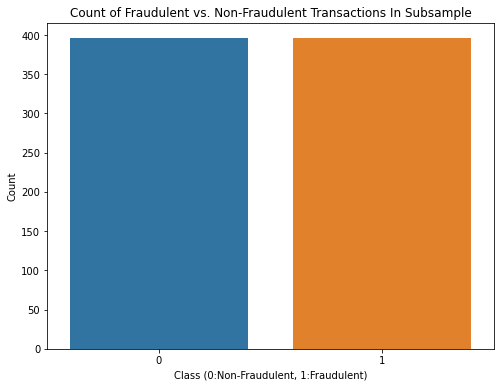

In [ ]:
counts_values = final_data.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=counts_values.index, y=counts_values)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Let's explore the outliers and remove the extreme outliers from the data

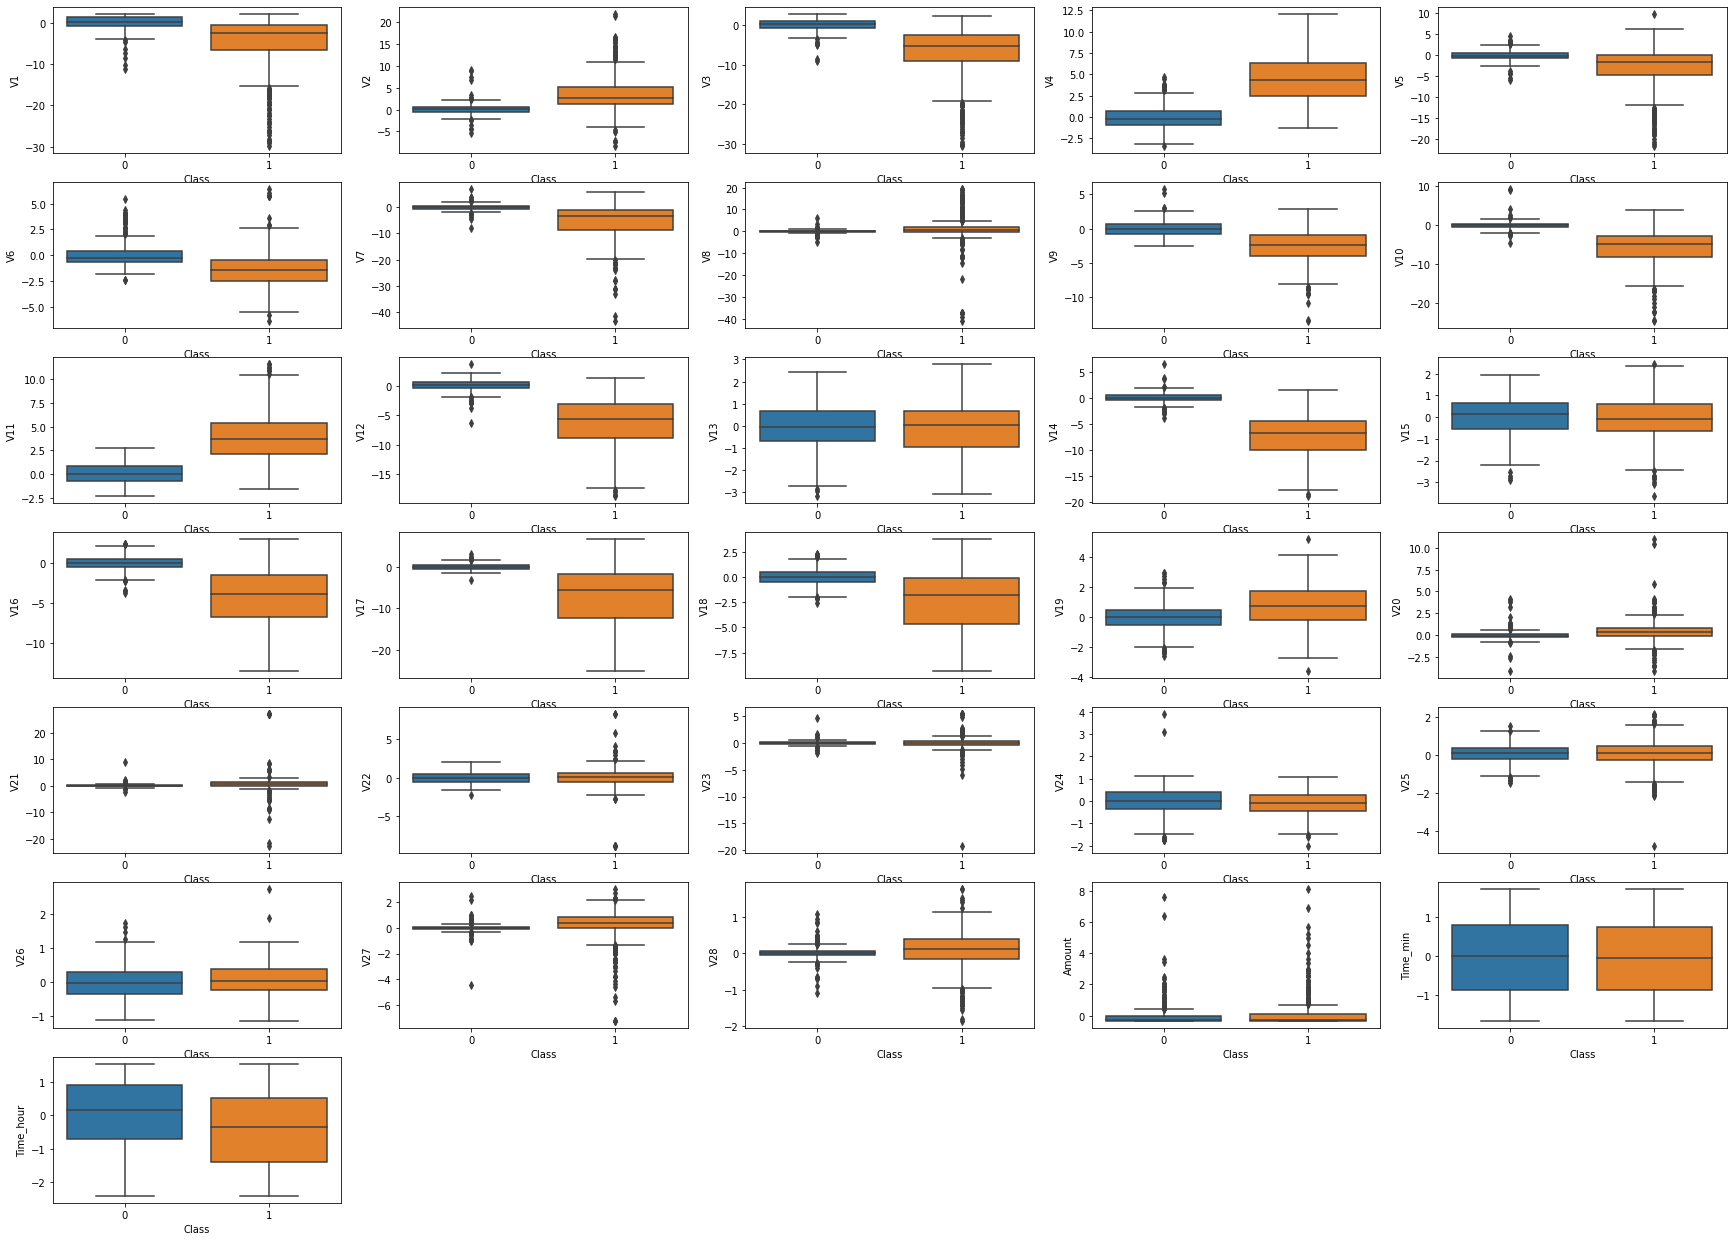

In [ ]:
#visualizing the features w high negative correlation
#f, axes = plt.subplots(nrows=6, ncols=6, figsize=(16,12))
lst=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21','V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time_min','Time_hour']
plt.figure(figsize=(30,22))
j=1
for i in lst:
  plt.subplot(7,5,j)
  sns.boxplot(x="Class", y=i, data=final_data)
  j+=1

Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers in statitices . In our we don't have any business requirement to remove outliers. Hence not removing outliers

In [ ]:

# #Only removing extreme outliers
# Q1 = final_data.quantile(0.25)
# Q3 = final_data.quantile(0.75)
# IQR = Q3 - Q1

# final_data = final_data[~((final_data < (Q1 - 2.5 * IQR)) |(final_data > (Q3 + 2.5 * IQR))).any(axis=1)]

In [ ]:
final_data.shape

(792, 32)

##Using T-SNE visulization for Class distribution

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_=final_data.drop('Class',axis=1)
y_=final_data['Class'] 

In [ ]:
#t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_.values)

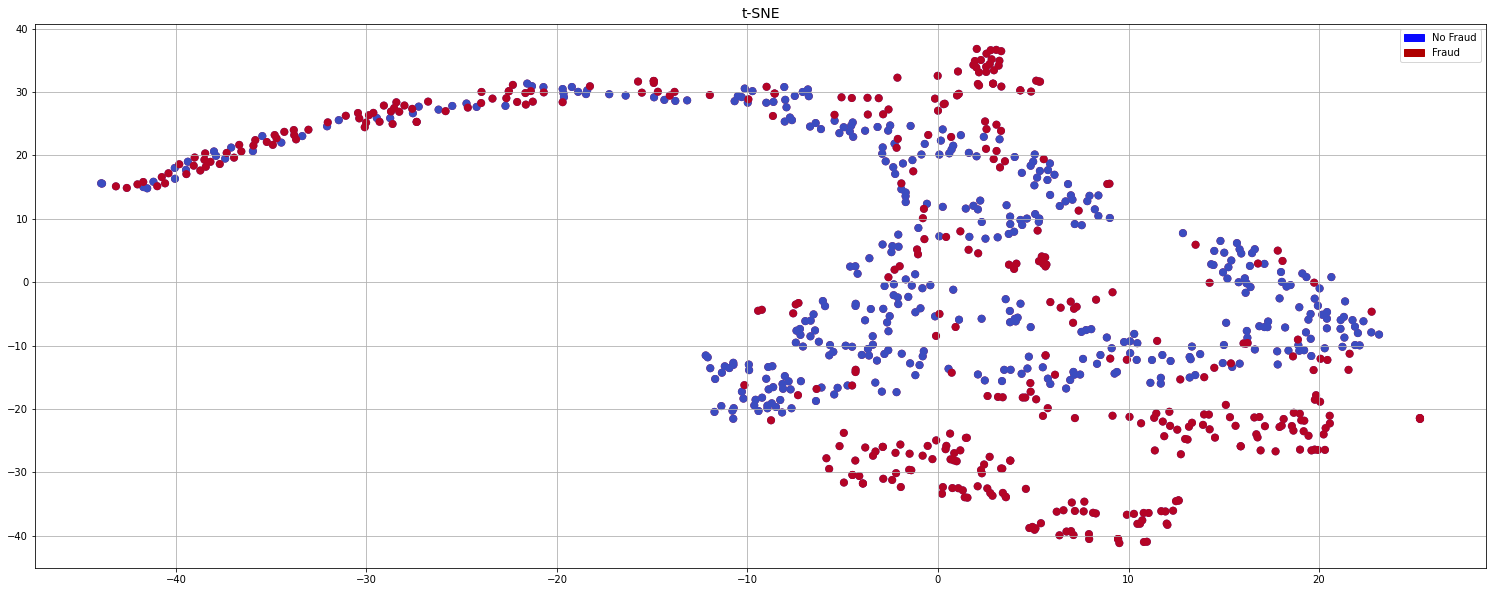

In [ ]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(26,10))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_tsne[:,0], X_tsne[:,1], c=(y_ == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_tsne[:,0], X_tsne[:,1], c=(y_ == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

From the above scatter plot we can assume that data can be linearly seperable. We can start building model with Logistic regression

## Logistic regression

In [ ]:
def logistic_model():
    # Creating model
    logreg = LogisticRegression()
    # Fitting model
    model_1=logreg.fit(X_,y_)
    # predting the train model
    Train_log_predicted=model_1.predict(X_)
    # Accuracy score of Training data
    print("The training data accuracy is {0} by Logistic regression ".format(roc_auc_score(y_,Train_log_predicted)))
    # Accuracy score of testing data
    Test_log_predicted=model_1.predict(X_test)
    print("The test data accuracy is {0} by Logistic regression ".format(roc_auc_score(y_test,Test_log_predicted)))
    print("----------Test data score------------:")
    results("Logistic regression",y_test,Test_log_predicted)
    print(confusion_matrix(y_test,Test_log_predicted))
    # Values for prediction
    true_test = np.array(y_test)
    predicted_t = np.array(Test_log_predicted)
    Cost_prediction(true_test,predicted_t)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The training data accuracy is 0.9558080808080808 by Logistic regression 
The test data accuracy is 0.927705592972954 by Logistic regression 
----------Test data score------------:
Logistic regression
accuracy: 0.9490888662617183
precision: 0.02921423774345198
recall: 0.90625
f1: 0.056603773584905655
[[53975  2891]
 [    9    87]]


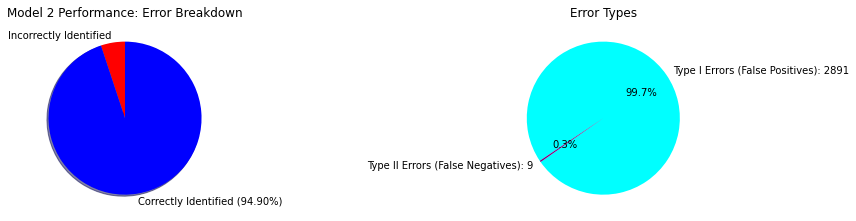

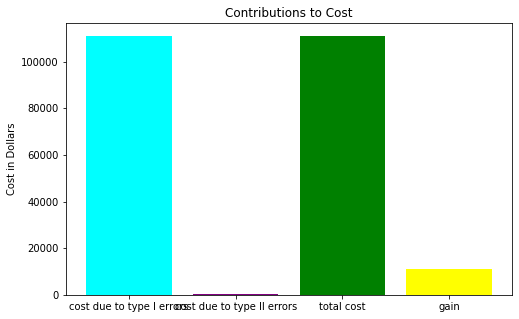

The total cost of this model on our test set is: $111012.
The profit or loss made by the model(Gain-Total cost) :$ -99843.9254


In [ ]:
logistic_model()

## Decision Trees

Model buling without hyper parameter

In [ ]:
# Creating model
dtree = DecisionTreeClassifier()


In [ ]:
def Decisiontree_model():

  # Fitting model
  model_1=dtree.fit(X_,y_)
  # predting the train model
  Train_log_predicted=model_1.predict(X_)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=model_1.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
  # Values for prediction
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 1.0 by Random Forest 
The test data accuracy is 0.865177749739153 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.8657701625645167
precision: 0.010756868843960602
recall: 0.8645833333333334
f1: 0.02124935995903738
[[49233  7633]
 [   13    83]]


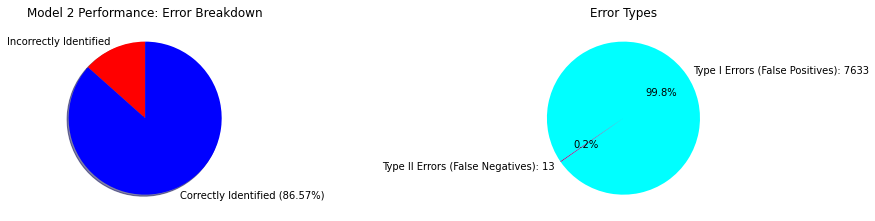

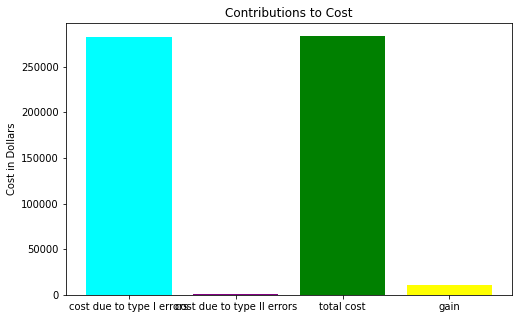

The total cost of this model on our test set is: $283659.
The profit or loss made by the model(Gain-Total cost) :$ -272954.3877


In [ ]:
Decisiontree_model()

Model building with hyperparameters

In [ ]:
#parameters to build the model on
param_grid = {
    "max_depth": [3,5, None],
    "min_samples_leaf":[10,20,30],
    "max_features": [5,6,7,8]
}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data
grid_search = GridSearchCV(estimator = dtree,scoring= 'roc_auc', param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=10), n_jobs = -1,verbose = 1)
grid_search.fit(X_, y_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
      

In [ ]:
 # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9638541666666667 using {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 20}


In [ ]:
# Creating model
dtree = DecisionTreeClassifier(max_depth=5,
    min_samples_leaf=20, 
    max_features=8)


In [ ]:
def Decisiontree_model():

  # Fitting model
  model_1=dtree.fit(X_,y_)
  # predting the train model
  Train_log_predicted=model_1.predict(X_)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=model_1.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # Values for prediction
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)
  

The training data accuracy is 0.9255050505050505 by Random Forest 
The test data accuracy is 0.8913884907794934 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9181032969347986
precision: 0.017529039070749736
recall: 0.8645833333333334
f1: 0.03436141585593045
[[52214  4652]
 [   13    83]]


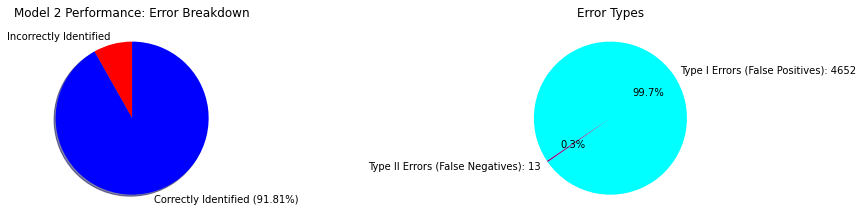

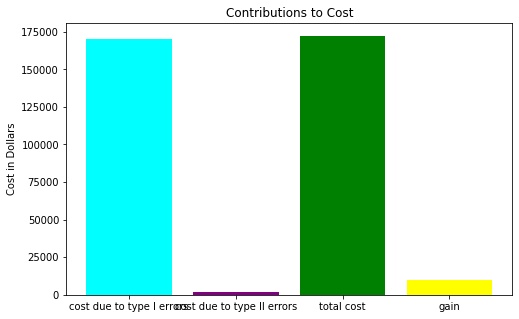

The total cost of this model on our test set is: $172199.
The profit or loss made by the model(Gain-Total cost) :$ -162516.8451


In [ ]:
Decisiontree_model()

## Random Forest

Model building without hyperparameters

In [ ]:
# Creating model
rondm_model = RandomForestClassifier()


In [ ]:
def Randomforest_model():

  # Fitting model
  model_1=rondm_model.fit(X_,y_)
  # predting the train model
  Train_log_predicted=model_1.predict(X_)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=model_1.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # Values for prediction
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 1.0 by Random Forest 
The test data accuracy is 0.9128951907408059 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9610442049085355
precision: 0.036260375709917
recall: 0.8645833333333334
f1: 0.06960167714884698
[[54660  2206]
 [   13    83]]


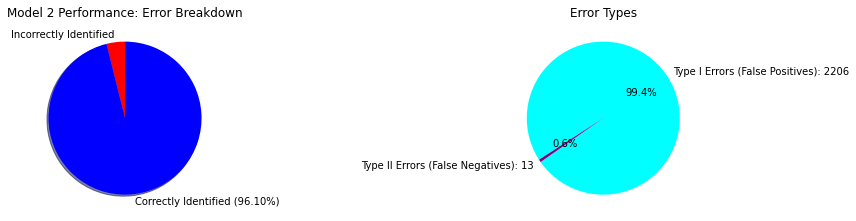

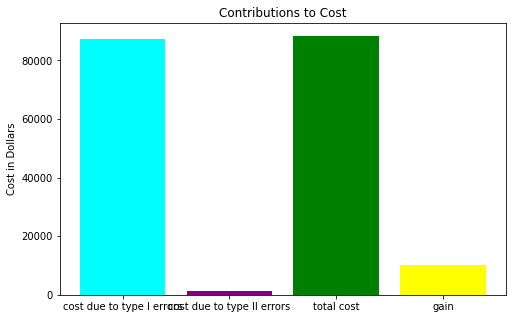

The total cost of this model on our test set is: $88337.2
The profit or loss made by the model(Gain-Total cost) :$ -78121.5085


In [ ]:
Randomforest_model()

Model Building with hyperparameter

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,22,7],
    'min_samples_leaf': [10,20,30],
    'min_samples_split': [10,20,30],
    'n_estimators': [10,20, 30], 
    'max_features': [5,6,7,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,scoring= 'roc_auc', param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=10), n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_,y_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  2.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
 # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9814134615384618 using {'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 30}


In [ ]:
# Creating model
rondm_model = RandomForestClassifier(max_depth=7,
    min_samples_leaf=10,
    min_samples_split=20,
    n_estimators=30, 
    max_features=6)
#  # Fitting model
# rondm_model=rf.fit(X_, y_)

In [ ]:
def Randomforest_model():

  # Fitting model
  model_1=rondm_model.fit(X_,y_)
  # predting the train model
  Train_log_predicted=model_1.predict(X_)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=model_1.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # Values for prediction
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 0.9532828282828283 by Random Forest 
The test data accuracy is 0.9131910250999424 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9720164320073031
precision: 0.049338146811071
recall: 0.8541666666666666
f1: 0.09328782707622299
[[55286  1580]
 [   14    82]]


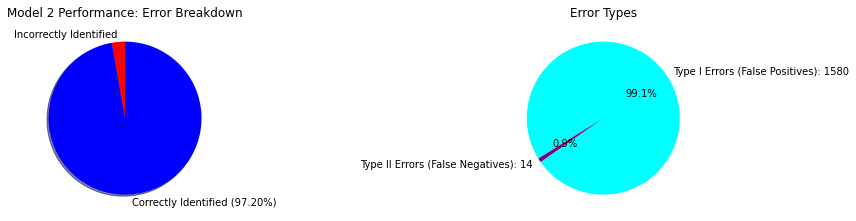

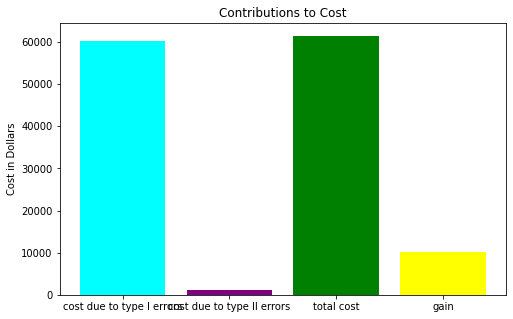

The total cost of this model on our test set is: $61429.3
The profit or loss made by the model(Gain-Total cost) :$ -51214.4103


In [ ]:
Randomforest_model()

## XGBoost

Model building without hyperparameters

In [ ]:
# Creating model
XGB_model = XGBClassifier()


In [ ]:
def XGBoost_model():

  # Fitting model
  model_1=XGB_model.fit(X_,y_)
  # predting the train model
  Train_log_predicted=model_1.predict(X_)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by XGBoost ".format(roc_auc_score(y_,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=model_1.predict(X_test)
  print("The test data accuracy is {0} by XGBoost ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("XGBoost",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
  # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 0.9987373737373737 by XGBoost 
The test data accuracy is 0.9288367243461237 by XGBoost 
----------Test data score------------:
XGBoost
accuracy: 0.9617288718794986
precision: 0.038120567375886524
recall: 0.8958333333333334
f1: 0.07312925170068027
[[54696  2170]
 [   10    86]]


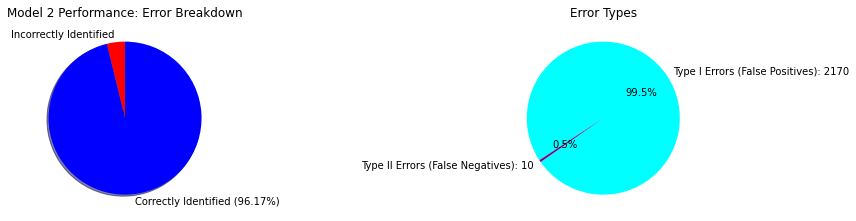

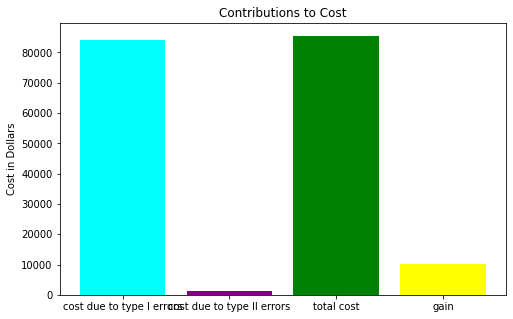

The total cost of this model on our test set is: $85450.9
The profit or loss made by the model(Gain-Total cost) :$ -75232.9442


In [ ]:
XGBoost_model()

Model building with hyperparameter tuning

In [ ]:
# hyperparameter tuning with XGBoost


# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5, 0.6], 
             'subsample': [0.1,0.2,0.3,0.4,0.5, 0.6,0.7,0.8, 0.9],'max_depth':[2,4]}          


# specify model
xgb_model = XGBClassifier( n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = StratifiedKFold(n_splits=10), 
                        verbose = 1,
                        return_train_score=True)   

model_cv.fit(X_, y_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  3.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary...tic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_de

In [ ]:
 # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.9847451923076921 using {'learning_rate': 0.2, 'max_depth': 4, 'subsample': 0.8}


In [ ]:
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':200,
          'subsample':0.8 }
# Creating model
XGB_model = XGBClassifier(params=params)



In [ ]:
def XGBoost_model():

  # Fitting model
  model_1=XGB_model.fit(X_,y_)
  # predting the train model
  Train_log_predicted=model_1.predict(X_)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by XGBoost ".format(roc_auc_score(y_,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=model_1.predict(X_test)
  print("The test data accuracy is {0} by XGBoost ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("XGBoost",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 0.9987373737373737 by XGBoost 
The test data accuracy is 0.9288367243461237 by XGBoost 
----------Test data score------------:
XGBoost
accuracy: 0.9617288718794986
precision: 0.038120567375886524
recall: 0.8958333333333334
f1: 0.07312925170068027
[[54696  2170]
 [   10    86]]


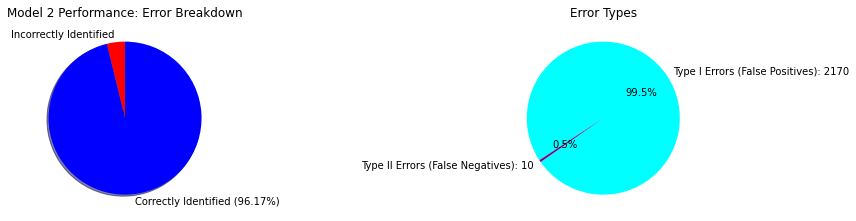

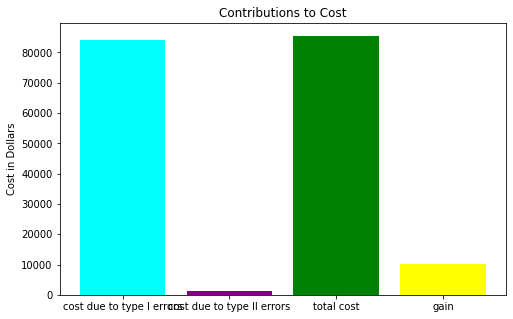

The total cost of this model on our test set is: $85450.9
The profit or loss made by the model(Gain-Total cost) :$ -75232.9442


In [ ]:
XGBoost_model()

# Oversampling Techniques


In [ ]:
# making copy of real data
Over_Sampling_data=Credit_data.copy()

In [ ]:
Over_Sampling_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0


In [ ]:
X=Over_Sampling_data.drop(['Class'],axis=1)
y=Over_Sampling_data['Class']

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_min,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
X_train.shape

(227845, 31)

In [ ]:
X_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_min,Time_hour
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,0.77,13,13
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,36.14,27,10
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,179.95,16,15
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,181.06,7,14
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,8.20,50,13


In [ ]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_min,Time_hour
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,1.99,11,12
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,6.99,30,4
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,306.16,33,14
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,0.99,10,19
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,30.27,14,13


## 1.SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
resampling_method = SMOTE()

X_train_smote, y_train_smote = resampling_method.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y_train_smote)

Counter({0: 227449, 1: 227449})

### Logistic Regression

In [ ]:
def Smote_logistic_model():
    # Creating model
    logreg = LogisticRegression()
    # Fitting model
    model_1=logreg.fit(X_train_smote,y_train_smote)
    # predting the train model
    Train_log_predicted=model_1.predict(X_train_smote)
    # Accuracy score of Training data
    print("The training data accuracy is {0} by Logistic regression ".format(roc_auc_score(y_train_smote,Train_log_predicted)))
    # Accuracy score of testing data
    Test_log_predicted=model_1.predict(X_test)
    print("The test data accuracy is {0} by Logistic regression ".format(roc_auc_score(y_test,Test_log_predicted)))
    print("----------Test data score------------:")
    results("Logistic regression",y_test,Test_log_predicted)
    print(confusion_matrix(y_test,Test_log_predicted))
       # values for visulization
    true_test = np.array(y_test)
    predicted_t = np.array(Test_log_predicted)
    Cost_prediction(true_test,predicted_t)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The training data accuracy is 0.9691821023614086 by Logistic regression 
The test data accuracy is 0.928962385256568 by Logistic regression 
----------Test data score------------:
Logistic regression
accuracy: 0.9827428812190583
precision: 0.07962085308056872
recall: 0.875
f1: 0.14596003475238922
[[55895   971]
 [   12    84]]


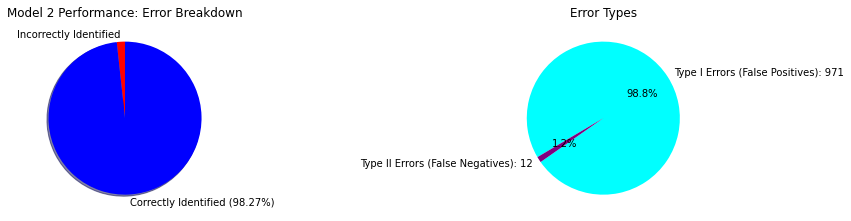

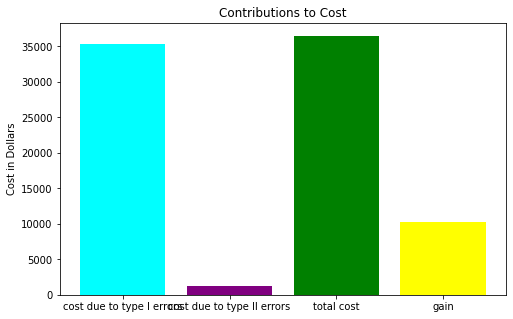

The total cost of this model on our test set is: $36465.6
The profit or loss made by the model(Gain-Total cost) :$ -26237.963


In [ ]:
Smote_logistic_model()

### Decision Trees

Model building without hypertunning

In [ ]:
# Creating model
dtree = DecisionTreeClassifier()
 # Fitting model
dtree_model=dtree.fit(X_train_smote, y_train_smote)

In [ ]:
def Smote_dtree_model_model():
  # predting the train model
  Train_log_predicted=dtree_model.predict(X_train_smote)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train_smote,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=dtree_model.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
      # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 1.0 by Random Forest 
The test data accuracy is 0.8687101768484977 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9974017766230119
precision: 0.36597938144329895
recall: 0.7395833333333334
f1: 0.4896551724137931
[[56743   123]
 [   25    71]]


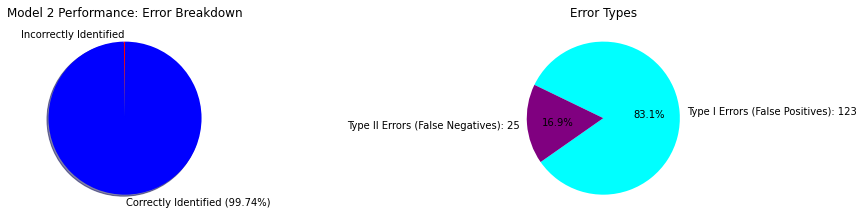

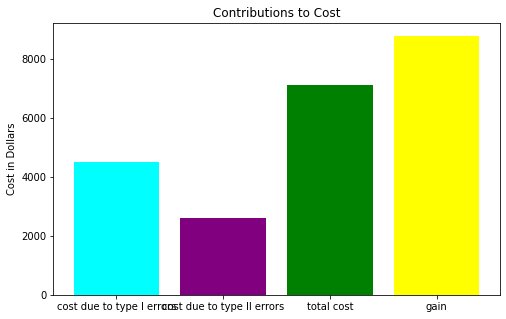

The total cost of this model on our test set is: $7131.33
The profit or loss made by the model(Gain-Total cost) :$ 1655.7445000000007


In [ ]:
Smote_dtree_model_model()

Model building with hyper-tunning

In [ ]:
#parameters to build the model on
param_grid = {
    'max_depth': [2,4,6,8,10,12],
    'min_samples_leaf': [10,20,30,40,50],
    'min_samples_split': [10,20,30,40,50],
    'max_features': [5, 8]
}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data
grid_search = GridSearchCV(estimator = dtree,scoring= 'roc_auc', param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=10), n_jobs = -1,verbose = 1)
grid_search.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
 # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9985370488317488 using {'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [ ]:
# Creating model
dtree = DecisionTreeClassifier(max_depth=12,
    # min_samples_leaf=30,
    # min_samples_split=20, 
    max_features=8)
 # Fitting model
dtree_model=dtree.fit(X_train_smote, y_train_smote)

In [ ]:
def Smote_dtree_model_model():
  # predting the train model
  Train_log_predicted=dtree_model.predict(X_train_smote)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train_smote,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=dtree_model.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 0.9892965016333332 by Random Forest 
The test data accuracy is 0.8708235149298351 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9912397738843439
precision: 0.1316270566727605
recall: 0.75
f1: 0.22395023328149297
[[56391   475]
 [   24    72]]


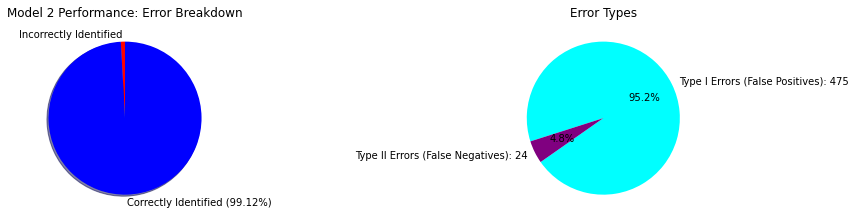

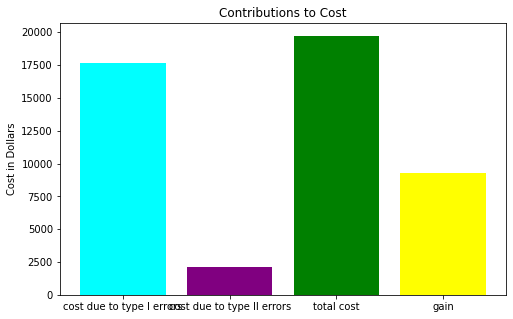

The total cost of this model on our test set is: $19722.3
The profit or loss made by the model(Gain-Total cost) :$ -10411.780200000003


In [ ]:
Smote_dtree_model_model()

###Random forest

Model building without hypertuning

In [ ]:
# Creating model
rf = RandomForestClassifier()
 # Fitting model
rondm_model=rf.fit(X_train_smote, y_train_smote)

In [ ]:
def Smote_rondomforest_model():
  # predting the train model
  Train_log_predicted=rondm_model.predict(X_train_smote)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train_smote,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=rondm_model.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 1.0 by Random Forest 
The test data accuracy is 0.8904491479970457 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9992802219023208
precision: 0.7894736842105263
recall: 0.78125
f1: 0.7853403141361256
[[56846    20]
 [   21    75]]


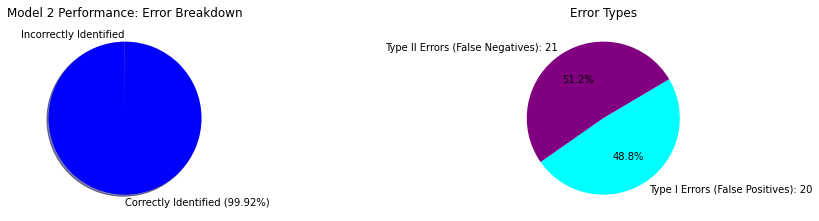

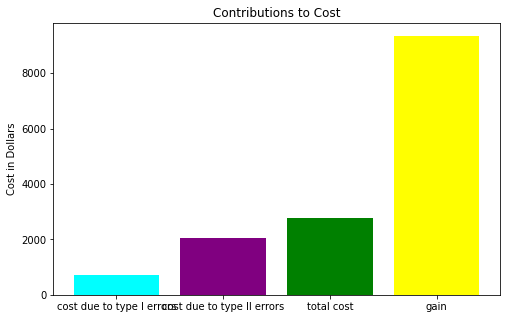

The total cost of this model on our test set is: $2781.51
The profit or loss made by the model(Gain-Total cost) :$ 6559.396099999998


In [ ]:
Smote_rondomforest_model()

Grid Search to Find Optimal Hyperparameters.

We can now find the optimal hyperparameters using GridSearchCV.

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,5],
    'n_estimators': [10,20,30,40,50], 
    'max_features': [5,6,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,scoring= 'roc_auc', param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=10), n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 76.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 143.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                        

In [ ]:
 # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9925806535587697 using {'max_depth': 5, 'max_features': 8, 'n_estimators': 40}


In [ ]:
# Creating model
rf = RandomForestClassifier(max_depth=5,
    
    n_estimators=40, 
    max_features=8)
 # Fitting model
rondm_model=rf.fit(X_train_smote, y_train_smote)

In [ ]:
def Smote_rondomforest_model():
  # predting the train model
  Train_log_predicted=rondm_model.predict(X_train_smote)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train_smote,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=rondm_model.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 0.9656252610475315 by Random Forest 
The test data accuracy is 0.9035770495550944 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9943471085987149
precision: 0.20418848167539266
recall: 0.8125
f1: 0.3263598326359832
[[56562   304]
 [   18    78]]


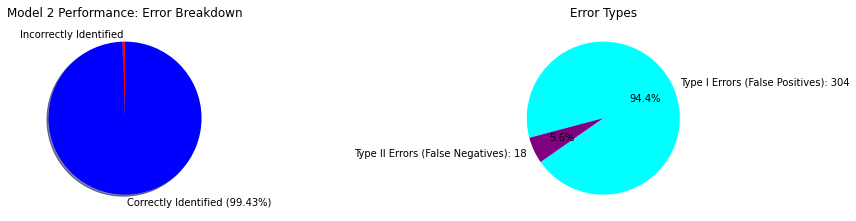

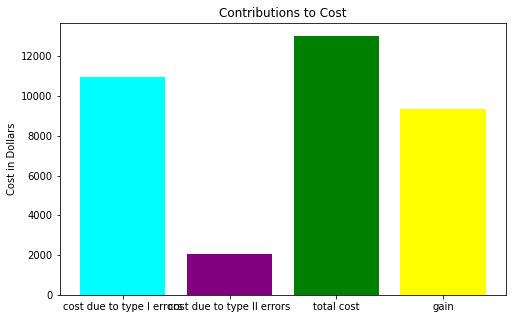

The total cost of this model on our test set is: $13022.7
The profit or loss made by the model(Gain-Total cost) :$ -3679.8546000000024


In [ ]:
Smote_rondomforest_model()

### XGBoost

Model buiding without hyper-tunning

In [ ]:
# Creating model
xgb_model = XGBClassifier()
# Fitting model
XGB_model=xgb_model.fit(X_train_smote, y_train_smote)

In [ ]:
def Smote_XGboost_model():
  # predting the train model
  Train_log_predicted=XGB_model.predict(X_train_smote)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by XGBoost ".format(roc_auc_score(y_train_smote,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=XGB_model.predict(X_test.values)
  print("The test data accuracy is {0} by XGBoost ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("XGBoost",y_test,Test_log_predicted)
  print("Confusion matrix")
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 0.9872081213810567 by XGBoost 
The test data accuracy is 0.9076599300695201 by XGBoost 
----------Test data score------------:
XGBoost
accuracy: 0.9921175520522454
precision: 0.15459882583170254
recall: 0.8229166666666666
f1: 0.2602965403624382
Confusion matrix
[[56434   432]
 [   17    79]]


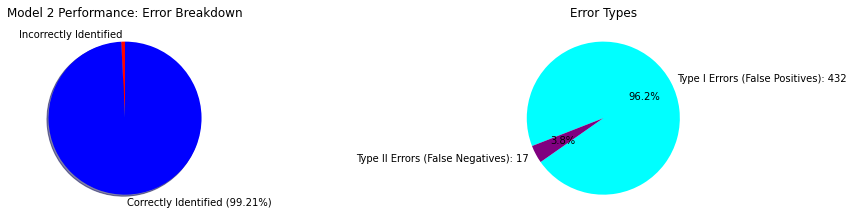

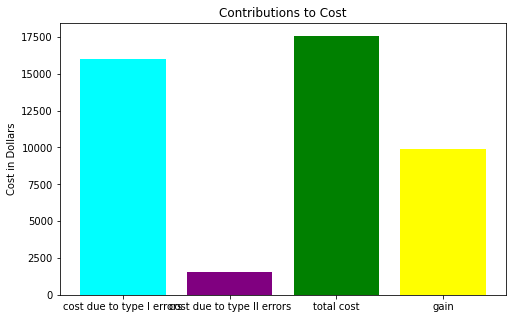

The total cost of this model on our test set is: $17571.2
The profit or loss made by the model(Gain-Total cost) :$ -7699.3469000000005


In [ ]:
Smote_XGboost_model()

In [ ]:
# hyperparameter tuning with XGBoost


# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.3,0.5, 0.7,0.9], 
             'subsample': [0.1,0.3,0.5, 0.7, 0.9],'max_depth':[2,4]}          


# specify model
xgb_model = XGBClassifier( n_estimators=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = StratifiedKFold(n_splits=10), 
                        verbose = 1,
                        return_train_score=True)   

model_cv.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
 # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

NameError: ignored

In [ ]:

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':100,
          'subsample':0.6 }
# Creating model
xgb_model = XGBClassifier(params=params)
# Fitting model
XGB_model=xgb_model.fit(X_train_smote, y_train_smote)



In [ ]:
def Smote_XGboost_model():
  # predting the train model
  Train_log_predicted=XGB_model.predict(X_train_smote)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by XGBoost ".format(roc_auc_score(y_train_smote,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=XGB_model.predict(X_test.values)
  print("The test data accuracy is {0} by XGBoost ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("XGBoost",y_test,Test_log_predicted)
  print("Confusion matrix")
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 0.9872081213810567 by XGBoost 
The test data accuracy is 0.9076599300695201 by XGBoost 
----------Test data score------------:
XGBoost
accuracy: 0.9921175520522454
precision: 0.15459882583170254
recall: 0.8229166666666666
f1: 0.2602965403624382
Confusion matrix
[[56434   432]
 [   17    79]]


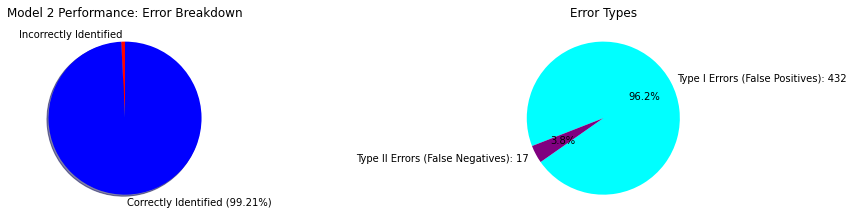

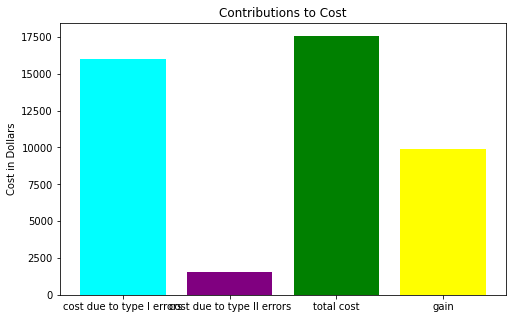

The total cost of this model on our test set is: $17571.2
The profit or loss made by the model(Gain-Total cost) :$ -7699.3469000000005


In [ ]:
Smote_XGboost_model()

## **2.Adaptive synthetic method**

In [ ]:
from imblearn.over_sampling import ADASYN
resampling_method = ADASYN()

X_train_ADASYN, y_train_ADASYN = resampling_method.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y_train_ADASYN)

Counter({0: 227449, 1: 227408})

### Logistic Regression

In [ ]:
def AdSyn_logistic_model():
  # Creating model
  logreg = LogisticRegression()
  # Fitting model
  model_1=logreg.fit(X_train_ADASYN,y_train_ADASYN)
  # predting the train model
  Train_log_predicted=model_1.predict(X_train_ADASYN)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Logistic regression ".format(roc_auc_score(y_train_ADASYN,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=model_1.predict(X_test)
  print("The test data accuracy is {0} by Logistic regression ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Logistic regression",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The training data accuracy is 0.9355054595526392 by Logistic regression 
The test data accuracy is 0.9351208689433639 by Logistic regression 
----------Test data score------------:
Logistic regression
accuracy: 0.9535128682279415
precision: 0.03225806451612903
recall: 0.9166666666666666
f1: 0.06232294617563739
[[54226  2640]
 [    8    88]]


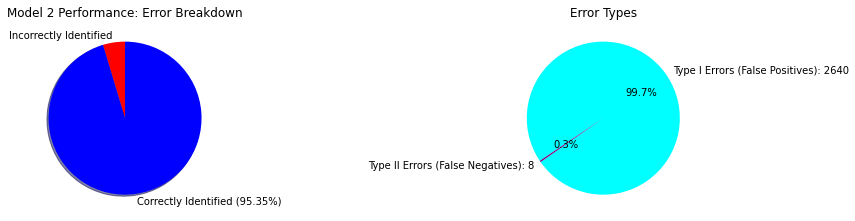

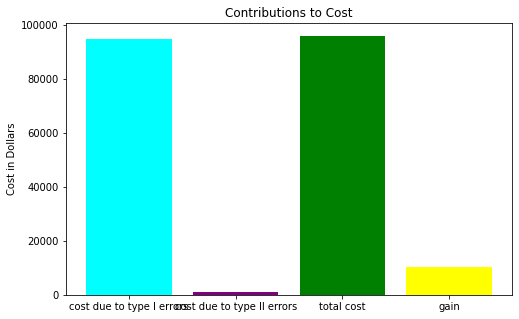

The total cost of this model on our test set is: $96006.7
The profit or loss made by the model(Gain-Total cost) :$ -85664.9483


In [ ]:
AdSyn_logistic_model()

### Decision Trees

Model building without hyper-tuning

In [ ]:
# Creating model
dtree = DecisionTreeClassifier()
 # Fitting model
dtree_model=dtree.fit(X_train_ADASYN,y_train_ADASYN)

In [ ]:
def Smote_dtree_model_model():
  # predting the train model
  Train_log_predicted=dtree_model.predict(X_train_ADASYN)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train_ADASYN,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=dtree_model.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 1.0 by Random Forest 
The test data accuracy is 0.853137932449384 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.997454443313086
precision: 0.3675675675675676
recall: 0.7083333333333334
f1: 0.4839857651245552
[[56749   117]
 [   28    68]]


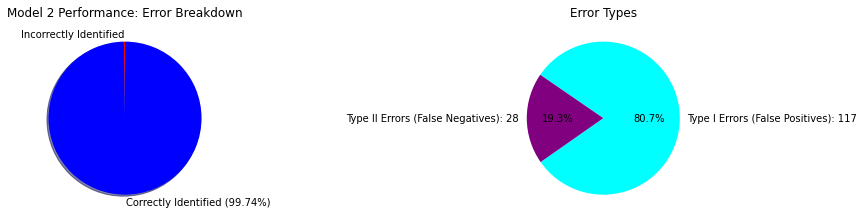

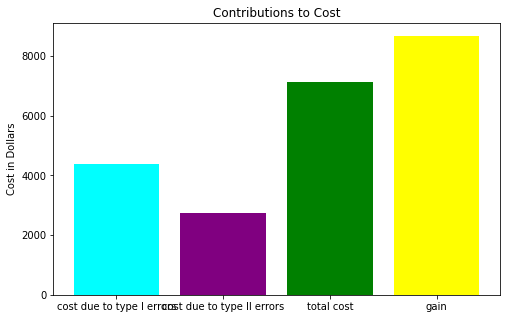

The total cost of this model on our test set is: $7129.59
The profit or loss made by the model(Gain-Total cost) :$ 1542.0070000000005


In [ ]:
Smote_dtree_model_model()

In [ ]:
#parameters to build the model on
param_grid = {
    'max_depth': [2,20,5],
    'max_features': [5,6,7,8]
}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data
model_cv = GridSearchCV(estimator = dtree,scoring= 'roc_auc', param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=10), n_jobs = -1,verbose = 1)

model_cv.fit(X_train_ADASYN,y_train_ADASYN) 

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
      

In [ ]:
  # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.9299394031056188 using {'max_depth': 20, 'max_features': 6}


In [ ]:
# Creating model
dtree = DecisionTreeClassifier(max_depth=20,
    max_features=6)
 # Fitting model
dtree_model=dtree.fit(X_train_ADASYN,y_train_ADASYN)

In [ ]:
def AdaSyn_dtree_regression():
     # predting the train model
  Train_log_predicted=dtree_model.predict(X_train_ADASYN)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train_ADASYN,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=dtree_model.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 0.9990239566225996 by Random Forest 
The test data accuracy is 0.888646664966764 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9956813314139251
precision: 0.25
recall: 0.78125
f1: 0.3787878787878788
[[56641   225]
 [   21    75]]


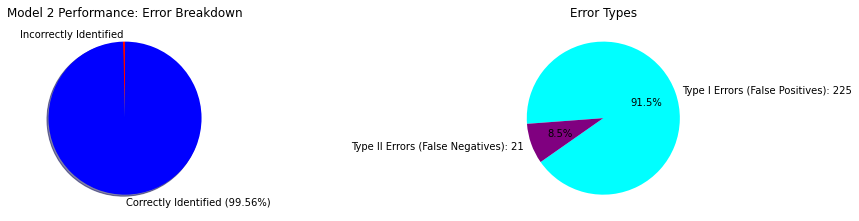

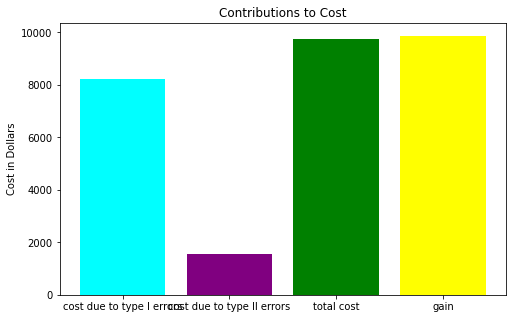

The total cost of this model on our test set is: $9749.94
The profit or loss made by the model(Gain-Total cost) :$ 118.28080000000045


In [ ]:
AdaSyn_dtree_regression()

### Random Forest

In [ ]:
# Create a based model
rf = RandomForestClassifier()
rondm_model=rf.fit(X_train_ADASYN,y_train_ADASYN)

In [ ]:
def Adaptive_rondomforest_model():
  # predting the train model
  Train_log_predicted=rondm_model.predict(X_train_ADASYN)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train_ADASYN,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=rondm_model.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 1.0 by Random Forest 
The test data accuracy is 0.890466733197341 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9993153330290369
precision: 0.8064516129032258
recall: 0.78125
f1: 0.7936507936507936
[[56848    18]
 [   21    75]]


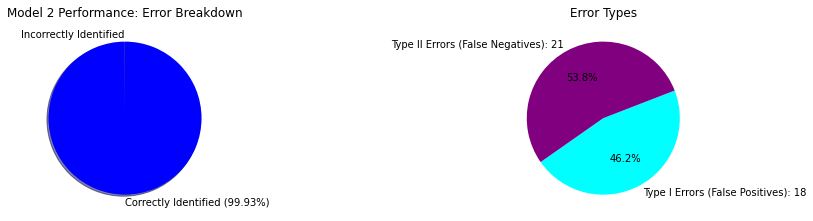

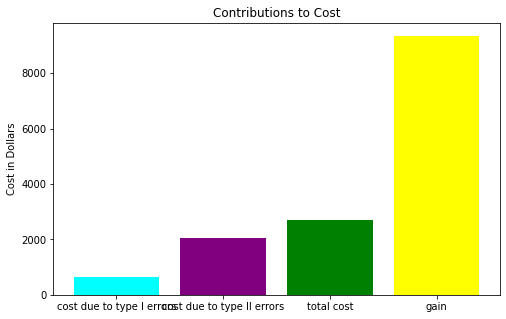

The total cost of this model on our test set is: $2712.48
The profit or loss made by the model(Gain-Total cost) :$ 6627.426099999998


In [ ]:
Adaptive_rondomforest_model()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,4],
    'n_estimators': [10,20,30,40], 
    'max_features': [5,6,7,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,scoring= 'roc_auc', param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=10), n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_ADASYN,y_train_ADASYN)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 53.6min


In [ ]:
  # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

NameError: ignored

In [ ]:
# Creating model
rf = RandomForestClassifier(max_depth=5,
    n_estimators=10, 
    max_features=7)
 # Fitting model
rondm_model=rf.fit(X_train_ADASYN,y_train_ADASYN)

In [ ]:
def Adaptive_rondomforest_model():
  # predting the train model
  Train_log_predicted=rondm_model.predict(X_train_ADASYN)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train_ADASYN,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=rondm_model.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 0.9427296564039978 by Random Forest 
The test data accuracy is 0.9098084385514484 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9860257715670095
precision: 0.09302325581395349
recall: 0.8333333333333334
f1: 0.16736401673640167
[[56086   780]
 [   16    80]]


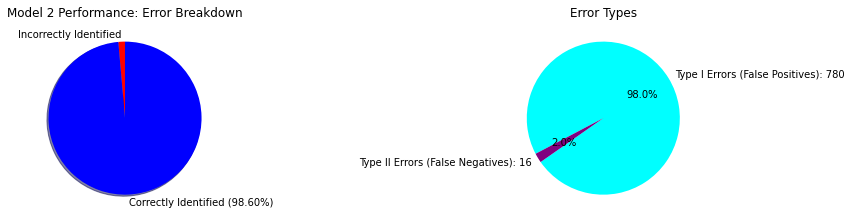

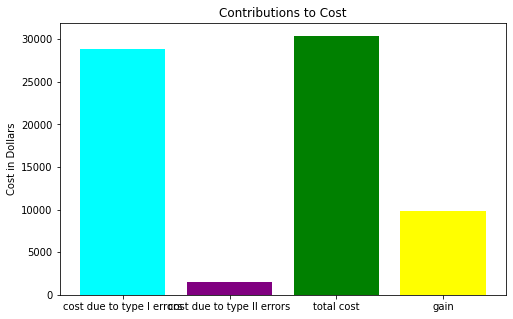

The total cost of this model on our test set is: $30382.0
The profit or loss made by the model(Gain-Total cost) :$ -20503.1073


In [ ]:
Adaptive_rondomforest_model()

### XGboost

Building model without hyper-tunning

In [ ]:

# Creating model
xgb_model = XGBClassifier()
# Fitting model
XGB_model=xgb_model.fit(X_train_ADASYN,y_train_ADASYN)

In [ ]:
def Adaptive_XGboost_model():
  # predting the train model
  Train_log_predicted=XGB_model.predict(X_train_ADASYN)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by XGBoost ".format(roc_auc_score(y_train_ADASYN,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=XGB_model.predict(X_test.values)
  print("The test data accuracy is {0} by XGBoost ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("XGBoost",y_test,Test_log_predicted)
  print("Confusion matrix")
  print(confusion_matrix(y_test,Test_log_predicted))
    # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)


The training data accuracy is 0.9867584940627895 by XGBoost 
The test data accuracy is 0.9040285862085136 by XGBoost 
----------Test data score------------:
XGBoost
accuracy: 0.9848671043853797
precision: 0.0854978354978355
recall: 0.8229166666666666
f1: 0.15490196078431373
Confusion matrix
[[56021   845]
 [   17    79]]


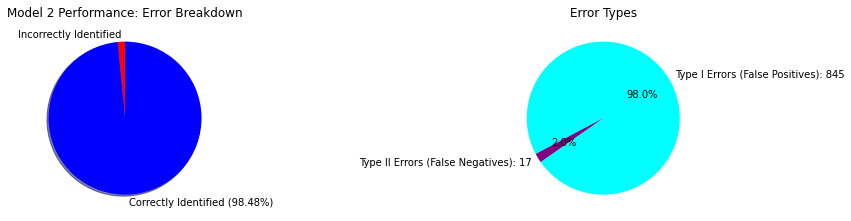

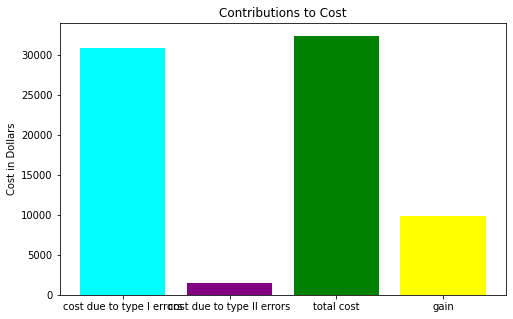

The total cost of this model on our test set is: $32418.8
The profit or loss made by the model(Gain-Total cost) :$ -22546.892


In [ ]:
Adaptive_XGboost_model()

In [ ]:
# hyperparameter tuning with XGBoost


# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],'max_depth':[2,4]}          


# specify model
xgb_model = XGBClassifier( n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = StratifiedKFold(n_splits=10), 
                        verbose = 1,
                        return_train_score=True)   

model_cv.fit(X_train_ADASYN,y_train_ADASYN)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.4 }
# Creating model
xgb_model = XGBClassifier(params=params)
# Fitting model
XGB_model=xgb_model.fit(X_train_ADASYN,y_train_ADASYN)

In [ ]:
def Adaptive_XGboost_model():
  # predting the train model
  Train_log_predicted=XGB_model.predict(X_train_ADASYN)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by XGBoost ".format(roc_auc_score(y_train_ADASYN,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=XGB_model.predict(X_test.values)
  print("The test data accuracy is {0} by XGBoost ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("XGBoost",y_test,Test_log_predicted)
  print("Confusion matrix")
  print(confusion_matrix(y_test,Test_log_predicted))
     # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 0.9867584940627895 by XGBoost 
The test data accuracy is 0.9040285862085136 by XGBoost 
----------Test data score------------:
XGBoost
accuracy: 0.9848671043853797
precision: 0.0854978354978355
recall: 0.8229166666666666
f1: 0.15490196078431373
Confusion matrix
[[56021   845]
 [   17    79]]


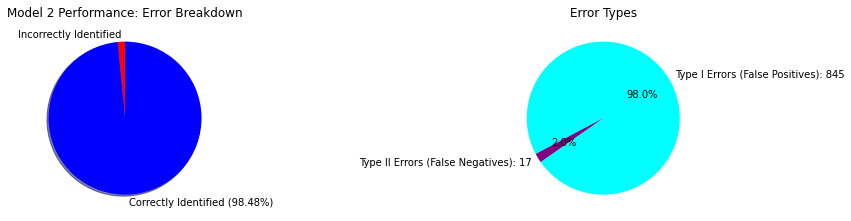

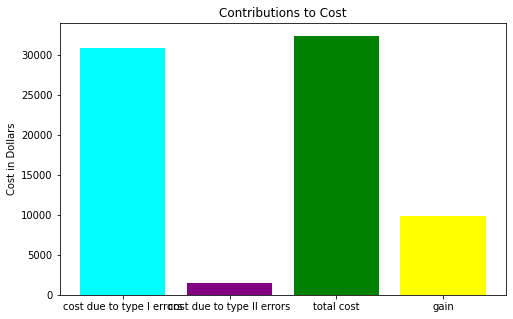

The total cost of this model on our test set is: $32418.8
The profit or loss made by the model(Gain-Total cost) :$ -22546.892


In [ ]:
Adaptive_XGboost_model()

# Calibrating probabilities for Imbalanced classification

## Decision trees

In [ ]:
X_train, X_test, y_train, y_test

In [ ]:
model = DecisionTreeClassifier()
# wrap the model
calibrated_DTC = CalibratedClassifierCV(model, method='sigmoid', cv=3)

# evaluate model
calibrated_DTC.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features=None,
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                                             min_weight_fraction_leaf=0.0,
                                                             presort='deprecated',
               

In [ ]:
def dtree_model_model():
  # predting the train model
  Train_log_predicted=calibrated_DTC.predict(X_train)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Decision trees ".format(roc_auc_score(y_train,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=calibrated_DTC.predict(X_test)
  print("The test data accuracy is {0} by Decision trees ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Decision Trees",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
      # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 0.9583333333333333 by Decision trees 
The test data accuracy is 0.8384449480650419 by Decision trees 
----------Test data score------------:
Decision Trees
accuracy: 0.9992626663389628
precision: 0.8552631578947368
recall: 0.6770833333333334
f1: 0.7558139534883721
[[56855    11]
 [   31    65]]


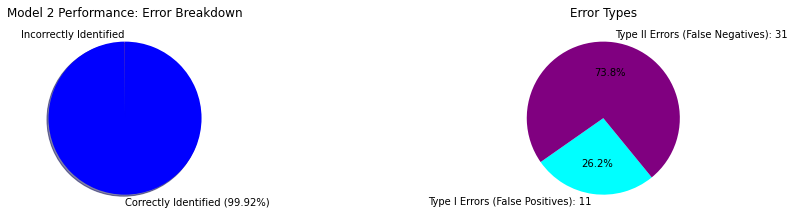

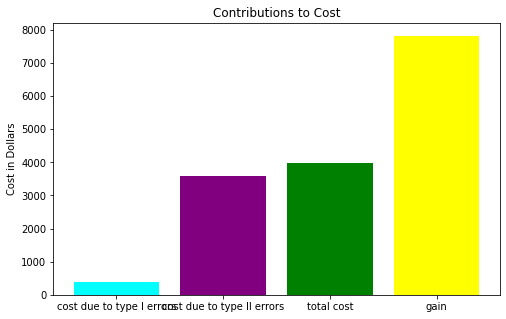

The total cost of this model on our test set is: $3986.70
The profit or loss made by the model(Gain-Total cost) :$ 3830.4409999999993


In [ ]:
dtree_model_model()

## Random Forest

In [ ]:
model = RandomForestClassifier()
# wrap the model
calibrated_DTC = CalibratedClassifierCV(model, method='sigmoid', cv=3)

# evaluate model
calibrated_DTC.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                               

In [ ]:
def randomForest_model_model():
  # predting the train model
  Train_log_predicted=calibrated_DTC.predict(X_train)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=calibrated_DTC.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
      # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 0.976010101010101 by Random Forest 
The test data accuracy is 0.8540611554648941 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9992977774656788
precision: 0.85
recall: 0.7083333333333334
f1: 0.7727272727272727
[[56854    12]
 [   28    68]]


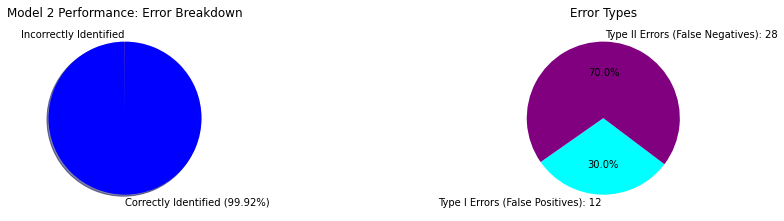

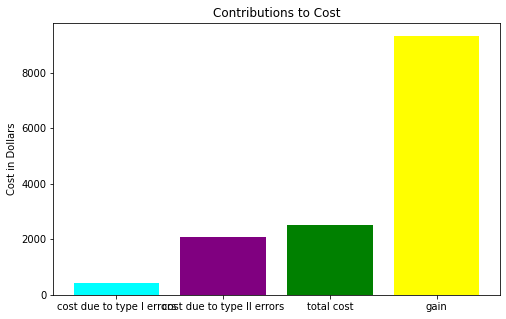

The total cost of this model on our test set is: $2505.27
The profit or loss made by the model(Gain-Total cost) :$ 6820.445300000001


In [ ]:
randomForest_model_model()

##XGboost

In [ ]:
model = XGBClassifier()
# wrap the model
calibrated_DTC = CalibratedClassifierCV(model, method='sigmoid', cv=3)

# evaluate model
calibrated_DTC.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=3,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=100, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=

In [ ]:
def XGBoost_model_model():
  # predting the train model
  Train_log_predicted=calibrated_DTC.predict(X_train)
  # Accuracy score of Training data
  print("The training data accuracy is {0} by Random Forest ".format(roc_auc_score(y_train,Train_log_predicted)))
  # Accuracy score of testing data
  Test_log_predicted=calibrated_DTC.predict(X_test)
  print("The test data accuracy is {0} by Random Forest ".format(roc_auc_score(y_test,Test_log_predicted)))
  print("----------Test data score------------:")
  results("Random Forest",y_test,Test_log_predicted)
  print(confusion_matrix(y_test,Test_log_predicted))
      # values for visulization
  true_test = np.array(y_test)
  predicted_t = np.array(Test_log_predicted)
  Cost_prediction(true_test,predicted_t)

The training data accuracy is 0.91665127860165 by Random Forest 
The test data accuracy is 0.8488352369312652 by Random Forest 
----------Test data score------------:
Random Forest
accuracy: 0.9992451107756047
precision: 0.8271604938271605
recall: 0.6979166666666666
f1: 0.7570621468926554
[[56852    14]
 [   29    67]]


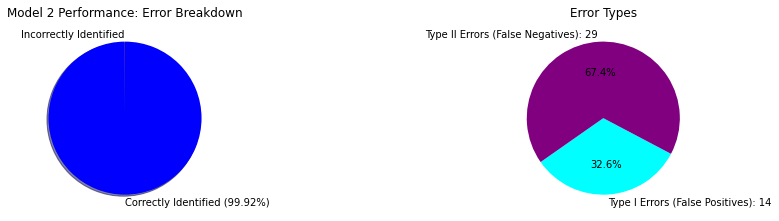

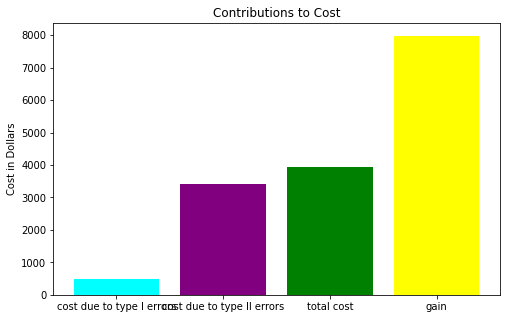

The total cost of this model on our test set is: $3924.64
The profit or loss made by the model(Gain-Total cost) :$ 4053.5030999999994


In [ ]:
XGBoost_model_model()